In [2]:
## IMPORTS AND DEFAULT PLOTTING PARAMETERS

import mne ## MNE-Python for analysing data
## below magic provides interactive plots in notebook
%matplotlib widget
from os import chdir
from os.path import join
import matplotlib.pyplot as plt ## for basic plotting
import matplotlib as mpl ## for setting default parameters



In [3]:
#%% LOAD SAMPLE DATA SET

sample_path = '/work/MEG_data/MNE-sample-data' ## UCloud
sample_meg_path = join(sample_path, 'MEG', 'sample')
chdir(sample_meg_path)
subjects_dir = '../../subjects/'

In [4]:
raw = mne.io.read_raw_fif('sample_audvis_raw.fif', preload=True)
events = mne.find_events(raw)
epochs = mne.Epochs(raw, events, event_id=dict(LV=3), picks='meg')
evoked = epochs.average()

Opening raw data file sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Reading 0 ... 166799  =      0.000 ...   277.714 secs...
Finding events on: STI 014
320 events found on stim channel STI 014
Event IDs: [ 1  2  3  4  5 32]
Not setting metadata
73 matching events found
Setting baseline interval to [-0.19979521315838786, 0.0] s
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 3)
3 projection items activated


In [5]:
fwd = mne.read_forward_solution('sample_audvis-meg-eeg-oct-6-fwd.fif')

Reading forward solution from /work/MEG_data/MNE-sample-data/MEG/sample/sample_audvis-meg-eeg-oct-6-fwd.fif...
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    2 source spaces read
    Desired named matrix (kind = 3523 (FIFF_MNE_FORWARD_SOLUTION_GRAD)) not available
    Read MEG forward solution (7498 sources, 306 channels, free orientations)
    Desired named matrix (kind = 3523 (FIFF_MNE_FORWARD_SOLUTION_GRAD)) not available
    Read EEG forward solution (7498 sources, 60 channels, free orientations)
    Forward solutions combined: MEG, EEG
    Source spaces transformed to the forward solution coordinate frame


Using data from preloaded Raw for 73 events and 421 original time points ...
0 bad epochs dropped
    Created an SSP operator (subspace dimension = 3)
    Setting small MEG eigenvalues to zero (without PCA)
Reducing data rank from 305 -> 302
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 8833
[done]
Computing rank from covariance with rank=None
    Using tolerance 3.4e-14 (2.2e-16 eps * 102 dim * 1.5  max singular value)
    Estimated rank (mag): 99
    MAG: rank 99 computed from 102 data channels with 0 projectors
Computing rank from covariance with rank=None
    Using tolerance 2.5e-13 (2.2e-16 eps * 203 dim * 5.5  max singular value)
    Estimated rank (grad): 203
    GRAD: rank 203 computed from 203 data channels with 0 projectors


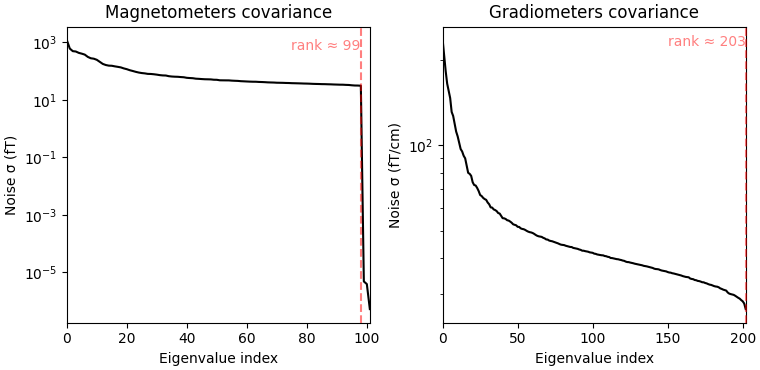

Converting forward solution to surface orientation
    Average patch normals will be employed in the rotation to the local surface coordinates....
    Converting to surface-based source orientations...
    [done]
info["bads"] and noise_cov["bads"] do not match, excluding bad channels from both
Computing inverse operator with 305 channels.
    305 out of 366 channels remain after picking
Selected 305 channels
Creating the depth weighting matrix...
    203 planar channels
    limit = 7262/7498 = 10.020865
    scale = 2.58122e-08 exp = 0.8
Applying loose dipole orientations to surface source spaces: 0.2
Whitening the forward solution.
    Created an SSP operator (subspace dimension = 3)
Computing rank from covariance with rank=None
    Using tolerance 4.5e-13 (2.2e-16 eps * 305 dim * 6.7  max singular value)
    Estimated rank (mag + grad): 302
    MEG: rank 302 computed from 305 data channels with 3 projectors
    Setting small MEG eigenvalues to zero (without PCA)
Creating the source co

In [ ]:
noise_cov = mne.compute_covariance(epochs, tmin=None, tmax=0)
noise_cov.plot(raw.info)

inverse_operator = mne.minimum_norm.make_inverse_operator(epochs.info, fwd,
                                                          noise_cov)

# estimating the source pattern for each time point Vvox(t)


In [ ]:

stc = mne.minimum_norm.apply_inverse(evoked=evoked, inverse_operator=inverse_operator, method='dSPM') # dSPM makes a depth correction
#Dale AM, Liu AK, Fischl BR, et al (2000) Dynamic Statistical Parametric Mapping: Combining fMRI and MEG for High-Resolution Imaging of Cortical Activity. Neuron 26:55–67. https://doi.org/10.1016/S0896-6273(00)81138-1




NameError: name 'mne' is not defined

Your morph is called `<subject>-oct-6-src-morph.h5` and is in `/work/freesurfer/<subject>/bem` and should be read with `mne.read_source_morph`.

In [ ]:
morph = mne.read_source_morph('your file')
stc_morph = morph.apply(stc)



These stc_morphs (one for each subject) can now be averaged, using the following code

In [ ]:
stc_average = stc_morph.copy() # pick the first subjects
for stc_morph in [stc1, stc2, stc3, stc4, stc5,stc6, stc7]: #stcs for your remaining subjects
    stc.average._data += stc_morph.data

stc.average._data /= n_subjects